In [27]:
%pylab inline --no-import-all

Populating the interactive namespace from numpy and matplotlib


In [28]:
import george
from george.kernels import MyDijetKernelSimp

import math
import time
import numpy as np
import scipy.stats as ss
import scipy.special as ssp
import scipy.optimize as op
from iminuit import Minuit

import ROOT as r
from rootpy.plotting import Hist, Hist2D, Legend, Canvas
import rootpy.plotting.root2matplotlib as rplt

### 13 TeV ATLAS dataset 3.6 fb-1. Bin centers, bin widths, and counts. Have 0 count bins removed - GP fails when these are included

In [29]:
#bin center
xval = np.array([1116.5, 1149.5, 
        1183.0, 1217.0, 1251.5, 1287.0, 1323.0, 1359.5, 1397.0, 1435.0, 1473.5, 1513.0, 1553.0, 1593.5, 1635.0, 
        1677.0, 1719.5, 1763.0, 1807.5, 1852.5, 1898.0, 1944.5, 1992.0, 2040.5, 2089.5, 2139.0, 2189.5, 2241.0, 
        2293.5, 2347.0, 2401.5, 2457.0, 2513.5, 2571.0, 2629.5, 2689.0, 2749.5, 2811.0, 2873.5, 2937.0, 3001.5, 
        3067.0, 3133.5, 3201.0, 3270.0, 3340.5, 3412.0, 3484.5, 3558.5, 3634.0, 3710.5, 3788.0, 3867.0, 3947.5, 
        4029.0, 4112.0, 4196.5, 4282.5, 4370.0, 4459.0, 4549.5, 4641.5, 4735.0, 4830.0, 4926.5, 5024.5,
        5226.0, 5329.0, 5434.0, 5541.0, 5761.0, 5874.0, 5989.0, 6985.0])

#bin width
xerr = np.array([33.0, 33.0, 34.0, 34.0, 35.0, 36.0, 36.0, 37.0, 38.0, 
           38.0, 39.0, 40.0, 40.0, 41.0, 42.0, 42.0, 43.0, 44.0, 45.0, 45.0, 46.0, 47.0, 48.0, 49.0, 49.0, 50.0, 
           51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 
           68.0, 70.0, 71.0, 72.0, 73.0, 75.0, 76.0, 77.0, 78.0, 80.0, 81.0, 82.0, 84.0, 85.0, 87.0, 88.0, 90.0,
           91.0, 93.0, 94.0, 96.0, 97.0, 99.0, 102.0, 104.0, 106.0, 108.0, 112.0, 114.0, 116.0, 134.0])
#events
yval = np.array([94818.0, 79694.0, 68785.0, 57904.0, 49639.0, 43560.0, 36824.0, 31977.0, 27754.0, 23474.0, 20189.0,
                 17655.0, 15195.0, 13104.0, 11297.0, 9533.0, 8263.0, 7120.0, 6222.0, 5253.0, 4678.0, 4035.0, 3545.0,
                 2977.0, 2611.0, 2253.0, 1931.0, 1737.0, 1516.0, 1264.0, 1069.0, 958.0, 796.0, 690.0, 632.0, 527.0,
                 446.0, 386.0, 352.0, 296.0, 260.0, 223.0, 191.0, 142.0, 134.0, 120.0, 90.0, 87.0, 76.0, 69.0, 58.0,
                 46.0, 39.0, 29.0, 32.0, 23.0, 18.0, 11.0, 14.0, 10.0, 11.0, 4.0, 6.0, 5.0, 6.0, 2.0, 3.0, 4.0,
                 3.0, 1.0, 1.0, 1.0, 2.0, 1.0])



### 13 TeV ATLAS dataset 3.6 fb-1

In [30]:
#bin center
xvalO = np.array([1116.5, 1149.5,1183.0, 1217.0, 1251.5, 1287.0, 1323.0, 1359.5, 1397.0, 1435.0, 1473.5, 1513.0, 
                  1553.0, 1593.5, 1635.0, 1677.0, 1719.5, 1763.0, 1807.5, 1852.5, 1898.0, 1944.5, 1992.0, 2040.5,
                  2089.5, 2139.0, 2189.5, 2241.0, 2293.5, 2347.0, 2401.5, 2457.0, 2513.5, 2571.0, 2629.5, 2689.0, 
                  2749.5, 2811.0, 2873.5, 2937.0, 3001.5, 3067.0, 3133.5, 3201.0, 3270.0, 3340.5, 3412.0, 3484.5, 
                  3558.5, 3634.0, 3710.5, 3788.0, 3867.0, 3947.5, 4029.0, 4112.0, 4196.5, 4282.5, 4370.0, 4459.0, 
                  4549.5, 4641.5, 4735.0, 4830.0, 4926.5, 5024.5, 5124.5, 5226.0, 5329.0, 5434.0, 5541.0, 5650.0, 
                  5761.0, 5874.0, 5989.0, 6106.0, 6225.0, 6346.0, 6469.0, 6594.5, 6722.5, 6852.5, 6985.0,
                  7120.0, 7257.0, 7396.5, 7538.5, 7683.0, 7830.0, 7979.5])

#bin width
xerrO = np.array([33.0, 33.0, 34.0, 34.0, 35.0, 36.0, 36.0, 37.0, 38.0, 38.0, 39.0, 40.0, 40.0, 41.0, 42.0, 42.0, 
                  43.0, 44.0, 45.0, 45.0, 46.0, 47.0, 48.0, 49.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 
                  57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 70.0, 71.0, 72.0, 73.0, 
                  75.0, 76.0, 77.0, 78.0, 80.0, 81.0, 82.0, 84.0, 85.0, 87.0, 88.0, 90.0, 91.0, 93.0, 94.0, 96.0,
                  97.0, 99.0, 101.0, 102.0, 104.0, 106.0, 108.0, 110.0, 112.0, 114.0, 116.0, 118.0, 120.0, 122.0,
                  124.0, 127.0, 129.0, 131.0, 134.0,
                  136.0, 138.0, 141.0, 143.0, 146.0, 148.0, 151.0])

#events
yvalO =np.array([94818.0, 79694.0, 68785.0, 57904.0, 49639.0, 43560.0, 36824.0, 31977.0, 27754.0, 23474.0, 20189.0,
                 17655.0, 15195.0, 13104.0, 11297.0, 9533.0, 8263.0, 7120.0, 6222.0, 5253.0, 4678.0, 4035.0, 3545.0,
                 2977.0, 2611.0, 2253.0, 1931.0, 1737.0, 1516.0, 1264.0, 1069.0, 958.0, 796.0, 690.0, 632.0, 527.0,
                 446.0, 386.0, 352.0, 296.0, 260.0, 223.0, 191.0, 142.0, 134.0, 120.0, 90.0, 87.0, 76.0, 69.0, 58.0,
                 46.0, 39.0, 29.0, 32.0, 23.0, 18.0, 11.0, 14.0, 10.0, 11.0, 4.0, 6.0, 5.0, 6.0, 2.0, 0.0, 3.0, 4.0,
                 3.0, 1.0, 0.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,
                 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

#bin low edge
xlowO = [1100.0, 1133.0, 1166.0, 1200.0, 1234.0, 1269.0, 1305.0, 1341.0, 1378.0, 1416.0, 1454.0, 1493.0, 
                  1533.0, 1573.0, 1614.0, 1656.0, 1698.0, 1741.0, 1785.0, 1830.0, 1875.0, 1921.0, 1968.0, 2016.0, 
                  2065.0, 2114.0, 2164.0, 2215.0, 2267.0, 2320.0, 2374.0, 2429.0, 2485.0, 2542.0, 2600.0, 2659.0, 
                  2719.0, 2780.0, 2842.0, 2905.0, 2969.0, 3034.0, 3100.0, 3167.0, 3235.0, 3305.0, 3376.0, 3448.0,
                  3521.0, 3596.0, 3672.0, 3749.0, 3827.0, 3907.0, 3988.0, 4070.0, 4154.0, 4239.0, 4326.0, 4414.0,
                  4504.0, 4595.0, 4688.0, 4782.0, 4878.0, 4975.0, 5074.0, 5175.0, 5277.0, 5381.0, 5487.0, 5595.0,
                  5705.0, 5817.0, 5931.0, 6047.0, 6165.0, 6285.0, 6407.0, 6531.0, 6658.0, 6787.0, 6918.0, 7052.0,
                    7188.0, 7326.0,7467.0, 7610.0,7756.0, 7914.0,8055.0]



#### Extended binning to lower and high mass

In [58]:
xvalO_ext = np.array([1116.5, 1149.5,1183.0, 1217.0, 1251.5, 1287.0, 1323.0, 1359.5, 1397.0, 1435.0, 1473.5, 1513.0, 
                  1553.0, 1593.5, 1635.0, 1677.0, 1719.5, 1763.0, 1807.5, 1852.5, 1898.0, 1944.5, 1992.0, 2040.5,
                  2089.5, 2139.0, 2189.5, 2241.0, 2293.5, 2347.0, 2401.5, 2457.0, 2513.5, 2571.0, 2629.5, 2689.0, 
                  2749.5, 2811.0, 2873.5, 2937.0, 3001.5, 3067.0, 3133.5, 3201.0, 3270.0, 3340.5, 3412.0, 3484.5, 
                  3558.5, 3634.0, 3710.5, 3788.0, 3867.0, 3947.5, 4029.0, 4112.0, 4196.5, 4282.5, 4370.0, 4459.0, 
                  4549.5, 4641.5, 4735.0, 4830.0, 4926.5, 5024.5, 5124.5, 5226.0, 5329.0, 5434.0, 5541.0, 5650.0, 
                  5761.0, 5874.0, 5989.0, 6106.0, 6225.0, 6346.0, 6469.0, 6594.5, 6722.5, 6852.5, 6985.0,
                  7120.0, 7257.0, 7396.5, 7538.5, 7683.0, 7830.0, 7979.5, 8131.5, 8286.0, 8443.5, 8604.0, 8767.5, 
                  8934.5, 9105.0, 9278.5, 9455.0, 9635.0, 9818.5, 10005.5, 10196.0, 10390.0, 10588.0, 10790.0,
                  10996.0, 11206.0, 11420.0, 11638.0, 11860.0, 12086.0, 12316.0, 12550.5, 12789.5])
xerrO_ext = np.array([33.0, 33.0, 34.0, 34.0, 35.0, 36.0, 36.0, 37.0, 38.0, 38.0, 39.0, 40.0, 40.0, 41.0, 42.0, 42.0, 
                  43.0, 44.0, 45.0, 45.0, 46.0, 47.0, 48.0, 49.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 
                  57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 70.0, 71.0, 72.0, 73.0, 
                  75.0, 76.0, 77.0, 78.0, 80.0, 81.0, 82.0, 84.0, 85.0, 87.0, 88.0, 90.0, 91.0, 93.0, 94.0, 96.0,
                  97.0, 99.0, 101.0, 102.0, 104.0, 106.0, 108.0, 110.0, 112.0, 114.0, 116.0, 118.0, 120.0, 122.0,
                  124.0, 127.0, 129.0, 131.0, 134.0,
                  136.0, 138.0, 141.0, 143.0, 146.0, 148.0, 151.0, 153.0, 156.0, 159.0, 162.0, 165.0, 169.0, 172.0, 
                  175.0, 178.0, 182.0, 185.0, 189.0, 192.0, 196.0, 200.0, 204.0, 208.0, 212.0, 216.0, 220.0, 224.0,
                  228.0, 232.0, 237.0, 241.0])
xlowO_ext = [1100.0, 1133.0, 1166.0, 1200.0, 1234.0, 1269.0, 1305.0, 1341.0, 1378.0, 1416.0, 1454.0, 1493.0, 
                  1533.0, 1573.0, 1614.0, 1656.0, 1698.0, 1741.0, 1785.0, 1830.0, 1875.0, 1921.0, 1968.0, 2016.0, 
                  2065.0, 2114.0, 2164.0, 2215.0, 2267.0, 2320.0, 2374.0, 2429.0, 2485.0, 2542.0, 2600.0, 2659.0, 
                  2719.0, 2780.0, 2842.0, 2905.0, 2969.0, 3034.0, 3100.0, 3167.0, 3235.0, 3305.0, 3376.0, 3448.0,
                  3521.0, 3596.0, 3672.0, 3749.0, 3827.0, 3907.0, 3988.0, 4070.0, 4154.0, 4239.0, 4326.0, 4414.0,
                  4504.0, 4595.0, 4688.0, 4782.0, 4878.0, 4975.0, 5074.0, 5175.0, 5277.0, 5381.0, 5487.0, 5595.0,
                  5705.0, 5817.0, 5931.0, 6047.0, 6165.0, 6285.0, 6407.0, 6531.0, 6658.0, 6787.0, 6918.0, 7052.0,
                  7188.0, 7326.0, 7467.0, 7610.0, 7756.0, 7904.0, 8055.0, 8208.0, 8364.0, 8523.0, 8685.0, 8850.0, 
                  9019.0, 9191.0, 9366.0, 9544.0, 9726.0, 9911.0, 10100.0, 10292.0, 10488.0, 10688.0, 10892.0, 
                  11100.0, 11312.0, 11528.0, 11748.0, 11972.0, 12200.0, 12432.0, 12669.0]#, 12910.0]


lowx = np.array([555.0,577.0,599.5,622.5,645.5,669.0,693.,717.5,742.5,768.0,794.,820.5,847.5,
                 875.0,903.0,931.5,961.0,991.0,1021.5,1052.5,1084.0])
lowerr = np.array([22.,22.,23.,23., 23.,24.,24.,25.,25.,26.,26., 27.,27.,28.,28.0,29.0,30.0,
                   30.0,31.0, 31.0, 32.0])

fullx = np.concatenate((lowx, xvalO_ext))
fullxerr = np.concatenate((lowerr, xerrO_ext))
print len(xvalO_ext), len(xerrO_ext), len(xlowO_ext)

115 115 115


### Save inputs as numpy arrays

In [32]:
np.save("newoutputs/xvalO_ext",xvalO_ext)
np.save("newoutputs/xerrO_ext", xerrO_ext)
np.save("newoutputs/xlowO_ext", xlowO_ext)

np.save("newoutputs/xval",xval)
np.save("newoutputs/yval", yval)
np.save("newoutputs/xerr", xerr)

np.save("newoutputs/xvalO_low",fullx)
np.save("newoutputs/xerrO_low",fullxerr )

np.save("newoutputs/xvalO",xvalO)
np.save("newoutputs/yvalO", yvalO)
np.save("newoutputs/xerrO", xerrO)
np.save("newoutputs/xlowO", xlowO)

### Gaussian signal function

In [33]:
def sig_model(x, N=1e5, mass=2000., width=100., xErr=xerr):
    return N*(np.exp(-(x-mass)**2/2/width/width)/np.sqrt(2*np.pi)/width)*xErr

### 3 parameter and 5 parameter fit function

In [34]:
def model_3param(t, params, xErr=xerr): 
    p0, p1, p2 = params
    sqrts = 13000.
    return (p0 * ((1.-t/sqrts)**p1) * (t/sqrts)**(p2))*(xErr)  

def model_5param(t, params, xErr=xerr): 
    p0, p1, p2, p3, p4 = params
    sqrts = 13000.
    return (p0 * ((1.-t/sqrts)**p1) * (t/sqrts)**(p2+p3*np.log(t/sqrts)+p4*np.log(t/sqrts)**2))*(xErr)

### Calculate z values. Shown on bottom panel of plots

In [35]:
def calcSignificance(Data, Bkg):
    pvals = []
    zvals = []
    chi2 = 0
    for i, nD in enumerate(Data):
        nB = Bkg[i]
        if nD != 0:
            if nB > nD:
                pval = 1.-ssp.gammainc(nD+1.,nB)
            else:
                pval = ssp.gammainc(nD,nB)
            prob = 1-2*pval
            if prob > -1 and prob < 1:
                zval = math.sqrt(2.)*ssp.erfinv(prob)
            else:
                zval = np.inf
               
            if zval > 100: zval = 20
            if zval < 0: zval = 0
            if (nD < nB): zval = -zval
        else: zval = 0
            
        zvals.append(zval)
        chi2 += ((nD - nB) ** 2 / abs(nB))
    return zvals, chi2

### Poisson log likelihood

In [36]:
def simpleLogPoisson(x, par):
    if x < 0: 
        return np.inf
    elif (x == 0): return -1.*par
    else:
        lnpoisson = x*np.log(par)-par-ssp.gammaln(x+1.)
        return lnpoisson

### Make toys: take smooth dataset and add Poisson noise, can scale up with luminosity

In [37]:
def makeToys(dataset, nPseudo=1000, lumi = 3.6):
    toys = []
    for n in range(nPseudo):
        pseudo = np.random.poisson(dataset*lumi/3.6)
        toys.append(pseudo)
    return toys

### remove zero count bins to use for GP fits

In [38]:
def removeZeros(data):
    indices = [i for i, y in enumerate(data) if y == 0]
    newylist=[]
    newxlist=[]
    newxerrlist=[]
    for k in range(len(data)):
        if k not in indices:
            newylist.append(data[k])
            newxlist.append(xvalO_ext[:len(xvalO)+5][k])
            newxerrlist.append(xerrO_ext[:len(xvalO)+5][k])
    return np.array(newylist), np.array(newxlist), np.array(newxerrlist)

### Make plot with fit overlaid on data on top panel, signficance on bottom panel

In [39]:
def makePrettyPlots(xs, ys, bkgs, title, legendName, xlow=xlowO, col = 'g', ymax = 2e5):
    f, (ax1, ax2) = plt.subplots(2, sharex=True, figsize=(12,12), gridspec_kw = {'height_ratios':[3, 1]})
    f.suptitle(title, fontsize=30)
    dataPlot = ax1.errorbar(xs, ys, marker='o', ls='None', yerr = np.sqrt(ys), c='black', markersize=10, label="ATLAS data")
    bkgPlot, =ax1.plot(xs, bkgs, color=col, linewidth=3.0, label=legendName)
    ax1.legend(prop={'size':20})
    ax1.set_ylabel('Events per bin', fontsize=40)
    ax1.tick_params(axis='y', labelsize=30)
    ax1.set_yscale('log', nonposy="clip")
    ax1.set_xscale('log')
    ax1.set_xlim([1000, 7500])
    ax1.set_ylim([0.01, ymax])

  
    #bin by bin significance    
    zvals, chi2 = calcSignificance(ys, bkgs)
    sigHist = Hist(xlow,markersize=0)
    for x in range(len(zvals)):
        if zvals[x] == np.inf or zvals[x] == -np.inf: sigHist[x] = 20
        else: sigHist[x] = zvals[x]  

    
    sigHist.fillstyle = 'solid'
    if col == 'g':
         sigHist.fillcolor = 'green'
    elif col == 'b':
         sigHist.fillcolor = 'blue'
    elif col == 'r':
         sigHist.fillcolor = 'red'
    else:
        sigHist.fillcolor = 'black'
    sigHist.linecolor = 'black'
    sigHist.linewidth = 1
    sigHist.Draw("histX0")
    rplt.bar(sigHist, xerr=None, yerr=None)
    ax2.axhline(0, color='black', lw=1)
    ax2.tick_params(axis='x', labelsize=30)
    ax2.tick_params(axis='y', labelsize=30)
    ax2.set_xlabel(r"$m_{jj}$ [TeV]", fontsize=40)
    ax2.set_ylabel('Significance', fontsize=40, labelpad=25)
    ax2.set_xscale('log')
    ax2.set_xlim([1000, 7500])
    ax2.set_xticks([1000, 2000, 3000, 4000, 5000, 6000, 7000])
    ax2.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    minor_ticks = np.arange(1000, 7500, 100)
    ax2.set_xticks(minor_ticks, minor=True)  
    labels = ["1","2","3","4","5","6","7"]
    ax2.set_xticklabels(labels)
    ax2.set_ylim([-5, 5])
    
    f.subplots_adjust(hspace=0)
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)    
    plt.show()


### Make plot with GP and background fit overlaid on data on top panel, middle panel significance of GP, bottom panel signficance of fit function

In [40]:
def makePrettyPlots_compare(xs, ys, bkggp, bkgff, title, ymax = 2e5):
    f, (ax1, ax2, ax3) = plt.subplots(3, sharex=True, figsize=(12,12), gridspec_kw = {'height_ratios':[3, 1, 1]})
    f.suptitle(title, fontsize=30)
    dataPlot = ax1.errorbar(xs, ys, marker='o', ls='None', yerr = np.sqrt(ys), c='black', markersize=10, label="Data")
    bkg1Plot, = ax1.plot(xs, bkggp, color='g', linewidth=3.0, label="Gaussian Process")
    bkg2Plot, = ax1.plot(xs, bkgff, color='b', linewidth=3.0, label="3 Parameter Fit Function")
    ax1.legend()
    ax1.set_ylabel('Events', fontsize=20)
    ax1.set_yscale('log', nonposy="clip")
    ax1.set_xscale('log')
    ax1.set_xlim([1000, 7500])
    ax1.set_ylim([0.3, ymax])
    ax1.tick_params(axis='y', labelsize=20)

    #bin by bin significance   
    zvals_gp, chi2_gp = calcSignificance(ys, bkggp)
    print "chi2 bkg+signal mu=0", chi2_gp
    sigHist_gp = Hist(xlowO,markersize=0)
    for x in range(len(zvals_gp)):
        if zvals_gp[x] == np.inf or zvals_gp[x] == -np.inf: sigHist_gp[x] = 20
        else: sigHist_gp[x] = zvals_gp[x]  
    sigHist_gp.fillstyle = 'solid'
    sigHist_gp.fillcolor = 'green'
    sigHist_gp.linecolor = 'black'
    sigHist_gp.linewidth = 1
    sigHist_gp.Draw("histX0")

    rplt.bar(sigHist_gp, xerr=None, yerr=None, axes=ax2)
    ax2.axhline(0, color='black', lw=1)
    ax2.set_ylabel('Significance', fontsize=20)
    ax2.set_xscale('log')
    ax2.tick_params(axis='y', labelsize=20)
    ax2.set_xlim([1000, 7500])
    ax2.set_ylim([-5, 5])


    zvals_ff, chi2_ff = calcSignificance(ys, bkgff)
    print "chi2 bkg+signal", chi2_ff
    sigHist_ff = Hist(xlowO,markersize=0)
    for x in range(len(zvals_ff)):
        if zvals_ff[x] == np.inf or zvals_ff[x] == -np.inf: sigHist_ff[x] = 20
        else: sigHist_ff[x] = zvals_ff[x]  
    sigHist_ff.fillstyle = 'solid'
    sigHist_ff.fillcolor = 'blue'
    sigHist_ff.linecolor = 'black'
    sigHist_ff.linewidth = 1
    sigHist_ff.Draw("histX0")
    rplt.bar(sigHist_ff, xerr=None, yerr=None, axes=ax3)
    ax3.axhline(0, color='black', lw=1)
    ax3.set_xlabel(r"$m_{jj}$ [TeV]", fontsize=30)
    ax3.set_ylabel('Significance', fontsize=20)
    ax3.set_xscale('log')
    ax3.tick_params(axis='y', labelsize=20)
    ax3.tick_params(axis='x', labelsize=20)
    ax3.set_ylim([-5, 5])
    ax3.set_xlim([1000, 7500])
    

    ax3.set_xticks([1000, 2000, 3000, 4000, 5000, 6000, 7000])
    ax3.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    minor_ticks = np.arange(1000, 7500, 100)
    ax3.set_xticks(minor_ticks, minor=True)  
    labels = ["1","2","3","4","5","6","7"]
    ax3.set_xticklabels(labels)
    
    f.subplots_adjust(hspace=0)
    plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)    
    plt.show()


### Poisson likelihood for 3 and 5 parameter fit functions

In [41]:
class logLike_3ff:
    def __init__(self, x, y, xe):
        self.x = x
        self.y = y
        self.xe = xe
    def __call__(self, p0, p1, p2):
        params = p0, p1, p2
        bkgFunc = model_3param(self.x, params, self.xe)       
        logL = 0
        for ibin in range(len(self.y)):
            data = self.y[ibin]
            bkg = bkgFunc[ibin]
            logL += -simpleLogPoisson(data, bkg)
        try:
            logL
            return logL
        except:
            return np.inf


class logLike_5ff:
    def __init__(self, x, y, xe):
        self.x = x
        self.y = y
        self.xe = xe
    def __call__(self, p0, p1, p2, p3, p4):
        params = p0, p1, p2, p3, p4
        bkgFunc = model_5param(self.x, params, self.xe)       
        logL = 0
        for ibin in range(len(self.y)):
            data = self.y[ibin]
            bkg = bkgFunc[ibin] 
            logL += -simpleLogPoisson(data, bkg)
        try:
            logL
            return logL
        except:
            return np.inf

### Minuit minimization of 3 and 5 parameter fit functions. minimize negative log likelihood, return minimum negative log likelihood and fit parameters corresponding to minimum. 

In [42]:
def fit_3ff(num,lnprob, Print=True):
    minLLH = np.inf
    best_fit_params = (0., 0., 0.)
    for i in range(num):
        init0 = np.random.random() * 1.
        init1 = np.random.random() * 8.
        init2 = np.random.random() * 6.
        m = Minuit(lnprob, throw_nan = False, pedantic = False, print_level = 0,
                  p0 = init0, p1 = init1, p2 = init2,
                  error_p0 = 1e-2, error_p1 = 1e-1, error_p2 = 1e-1, 
                  limit_p0 = (0, 100.), limit_p1 = (-100., 100.), limit_p2 = (-100., 100.))
        m.migrad()
        if m.fval < minLLH:
            minLLH = m.fval
            best_fit_params = m.args 
    if Print:
        print "min LL", minLLH
        print "best fit vals", best_fit_params
    return minLLH, best_fit_params


def fit_5ff(num,lnprob, Print = True):
    minLLH = np.inf
    best_fit_params = (0., 0., 0., 0., 0.)
    for i in range(num):
        init0 = np.random.random() * 1.
        init1 = np.random.random() * 8.
        init2 = np.random.random() * 6.
        init3 = np.random.random() * 1.
        init4 = np.random.random() * 1.
        m = Minuit(lnprob, throw_nan = False, pedantic = False, print_level = 0,
                  p0 = init0, p1 = init1, p2 = init2, p3 = init3, p4 = init4,
                  error_p0 = 1e-2, error_p1 = 1e-1, error_p2 = 1e-1, error_p3 = 1e-2, error_p4 = 1e-2,
                  limit_p0 = (0, 10), limit_p1 = (-20, 20), limit_p2 = (-20, 20), 
                   limit_p3 = (-20, 20), limit_p4 = (0, 50))
        m.migrad()
        if m.fval < minLLH:
            minLLH = m.fval
            best_fit_params = m.args 
    if Print:
        print "min LL",minLLH
        print "best fit vals", best_fit_params
    return minLLH, best_fit_params

### mean function for GP - 3 parameter fit function. negative log likelihood for Gaussian Process - from george. Minuit minimzation for GP negative log likelihood. Return minimum log likelihood and hyperparameters and mean parameters corresponding to this minimum.

In [43]:
def model_gp(params, t, xerr=xerr): 
    p0, p1, p2 = params
    sqrts = 13000.
    return (p0 * (1.-t/sqrts)**p1 * (t/sqrts)**(p2))*xerr

class logLike_gp:
    def __init__(self, x, y, xerr):
        self.x = x
        self.y = y
        self.xerr = xerr
    def __call__(self, Amp, decay, length, power, sub, p0, p1, p2):
        kernel = Amp * MyDijetKernelSimp(a = decay, b = length, c = power, d = sub)
        gp = george.GP(kernel)
        try:
            gp.compute(self.x, np.sqrt(self.y))
            return -gp.lnlikelihood(self.y - model_gp((p0,p1,p2), self.x, self.xerr))
        except:
            return np.inf
        
def fit_gp_minuit(num, lnprob):
    minLLH = np.inf
    best_fit_params = (0, 0, 0, 0, 0, 0, 0, 0)
    for i in range(num):
        init0 = np.random.random() * 1e6+1
        init1 = np.random.random() * 400.
        init2 = np.random.random() * 10. 
        init3 = np.random.random() * -100.
        init4 = np.random.random() * 650.
        init5 = np.random.random() * 1.
        init6 = np.random.random() * 1.
        init7 = np.random.random() * -1.
        m = Minuit(lnprob, throw_nan = False, pedantic = False, print_level = 0,
                  Amp = init0, decay = init1, length = init2, power = init3, sub = init4, 
                   p0 = init5, p1 = init6, p2 = init7,
                  error_Amp = 1e1, error_decay = 1e1, error_length = 1e-1, error_power = 1e-1, 
                   error_sub = 1e-1, error_p0 = 1e-2, error_p1 = 1e-2, error_p2 = 1e-2,
                    limit_Amp = (100., 1e15), limit_decay = (1, 3000), limit_length = (0.1, 1000),
                   limit_power = (10, 3000), limit_sub = (200, 2000), limit_p0 = (0,1000), 
                   limit_p1 = (0, 100), limit_p2 = (-100,100)) 

        m.migrad()
        if m.fval < minLLH:
            minLLH = m.fval
            best_fit_params = m.args 
    print "min LL", minLLH
    print "best fit vals",best_fit_params
    return minLLH, best_fit_params

### Simple BumpHunter function - return most region of largest excess and BumpHunter p value

In [44]:
doDeficit = False #look for significant deficits as well as excesses?
def BumpHunter(dataHist, bkgHist):
    #Initial parameters
    ################
    if len(dataHist)!=len(bkgHist):
        print "check your inputs!"
        return None
    numBins = len(bkgHist)
    #minimum number of bins to check for excess
    minBins = 2
    #maximum number of bins to check for excess
    maxBins = len(bkgHist)/2
    #first bin to start bump hunter
    firstBin = 0 
    #last bin included in bump hunter
    lastBin = len(bkgHist) 
    nBins = len(bkgHist)
    #if there's empty bins at the end of the histogram, truncate it
    for yi, y in reversed(list(enumerate(dataHist))):
        if y ==0:
            lastBin = yi-1
            break
    #minimum and maximum bins allowed in bump
    MinBinsInBump = 1
    MaxBinsInBump = 1e5
    #####################
    #keep track of lowest BumpHunter p value, and its corresponding bin range
    mostInterestingP, lowEdgeMostInteresting, highEdgeMostInteresting = 1, 0, 0
    # Left hand side of leftmost bin in bump at minimum of its range
    minBinL = 0
    #Left hand side of leftmost bin in bump at maximum of its range
    maxBinL = 0
    #p-value in center
    probC = 1

    minWidth = max(MinBinsInBump,1);
    maxWidth = min(MaxBinsInBump,nBins/2);
        
    #scan from 1 bin to half bin range in possible widths of bump    
    for width in range(minWidth, maxWidth+1, 1):
        minBinL = firstBin
        maxBinL = lastBin - width + 1
        nbinsinstep = 1 #max(1,width/2)
        #initialize lowest BumpHunter p value and the bins associated with it
        smallestPforWidth = 1
        lowEdgeForWidth = 0
        highEdgeForWidth = 0
        
        for binL in range(minBinL, maxBinL, nbinsinstep):
            binR = binL+width-1

            #total data and background counts in window
            dC, bC= GetEffectiveBandContents(bkgHist, dataHist, binL, binR)

            if not doDeficit: 
                if dC <= bC: continue
                        
            probC = PoissonPval(dC,bC)
            if probC < 0.000001: continue
            #update lowest BumpHunter p value and bins associated with it for this width
            if probC < smallestPforWidth:
                smallestPforWidth = probC
                lowEdgeForWidth = xlowO[binL]
                highEdgeForWidth = xlowO[binR] + xerrO[binR]
    
        #update lowest BumpHunter p value and bins associated with it overall
        if smallestPforWidth < mostInterestingP: 
            mostInterestingP = smallestPforWidth
            lowEdgeMostInteresting = lowEdgeForWidth
            highEdgeMostInteresting = highEdgeForWidth
    return -np.log(mostInterestingP), lowEdgeMostInteresting, highEdgeMostInteresting

#total data and background cunts in window
def GetEffectiveBandContents(bkgHist, dataHist, firstBin, lastBin):
    dataIntegral, bkgIntegral = 0, 0
    for b in range(firstBin, lastBin+1, 1):
        dataIntegral += dataHist[b]
        bkgIntegral += bkgHist[b]
    return dataIntegral, bkgIntegral

#poisson p value
def PoissonPval(data, bkg):
    answer = 1
    if data >= bkg:
        answer = ssp.gammainc(data,bkg)
    else:
        answer = 1. - ssp.gammainc(data+1,bkg)
    return answer

### Fit GP to data only (fixed hyperparameters set here)

In [45]:
lnProb = logLike_gp(xval,yval, xerr)
minimumLLH, best_fit_hyperparams = fit_gp_minuit(100, lnProb)
fixedHyperparams = best_fit_hyperparams
np.save("newoutputs/fixedHyperparams.npy", fixedHyperparams)
#best_fit_hyperparams = np.load("newoutputs/fixedHyperparams.npy")

Amp, decay, length, power, sub, p0, p1, p2 = best_fit_hyperparams
kernel = Amp * MyDijetKernelSimp(a = decay, b = length, c = power, d=sub)
gp = george.GP(kernel)
gp.compute(xval, np.sqrt(yval))
meanGP, covGP = gp.predict(yval - model_gp(best_fit_hyperparams[5:],xval, xerr), xvalO)
meanGPnom = meanGP + model_3param(xvalO,best_fit_hyperparams[5:],xerrO)

min LL 310.696327731
best fit vals (439600429.47150165, 33.202070297662026, 251.26998519083986, 2196.5811164969114, 219.56575844165584, 0.016614570070960788, 8.463511281876235, -5.222505114071211)


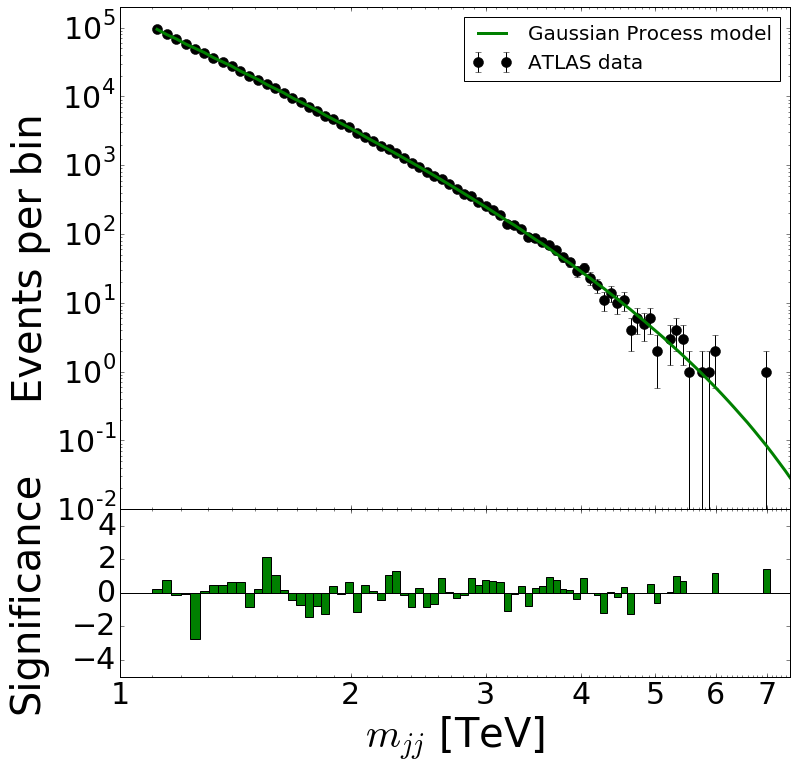

In [46]:
label = ""
legendName = "Gaussian Process model"
makePrettyPlots(xvalO, yvalO, meanGPnom, label, legendName)

### 3 parameter fit

In [47]:
lnProb = logLike_3ff(xvalO,yvalO,xerrO)
minimumLLH, best_fit_params = fit_3ff(100, lnProb)
bkg3param = model_3param(xvalO, best_fit_params, xerrO)

min LL 318.320095435
best fit vals (0.016134318735844255, 8.389386694125363, -5.231815612167409)


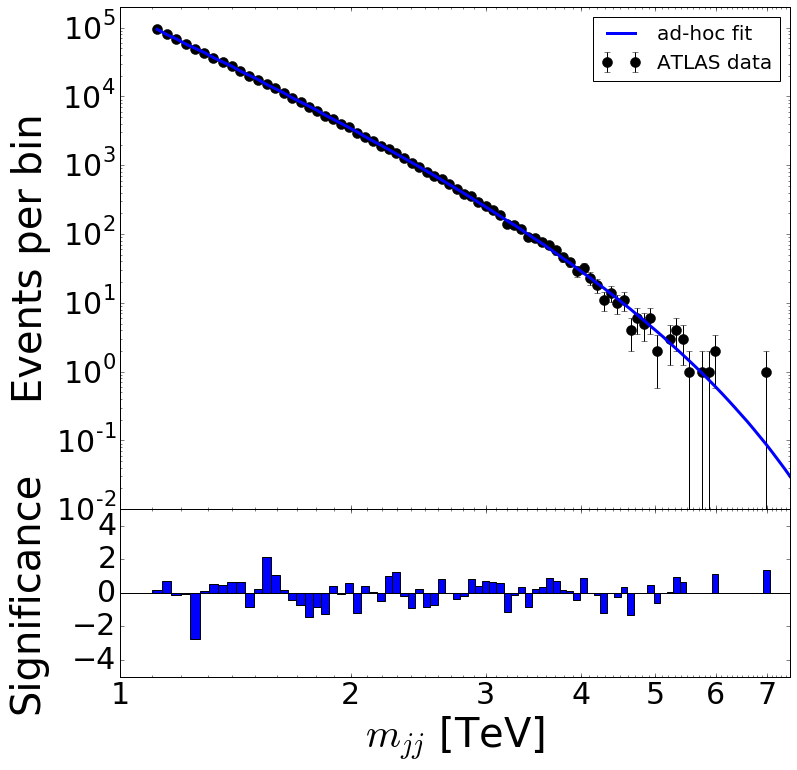

In [48]:
label = ""
legendName = "ad-hoc fit"
makePrettyPlots(xvalO, yvalO, bkg3param, label, legendName, xlowO, 'b')

### Test out simple BumpHunter - gives same results as 3.6 fb-1 paper

In [49]:
BumpHunter(yvalO, bkg3param)

(4.5478888724565065, 1533.0, 1614.0)

### 5 parameter fit

In [50]:
lnProb = logLike_5ff(xvalO,yvalO,xerrO)
minimumLLH, best_fit_params = fit_5ff(100, lnProb)
bkg5param = model_5param(xvalO, best_fit_params, xerrO)

/Users/MeghanFrate/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log


min LL 318.224337837
best fit vals (0.24770472149290457, 10.557030984697164, -2.705183387255378, 0.8828892355566609, 0.11187687587091988)


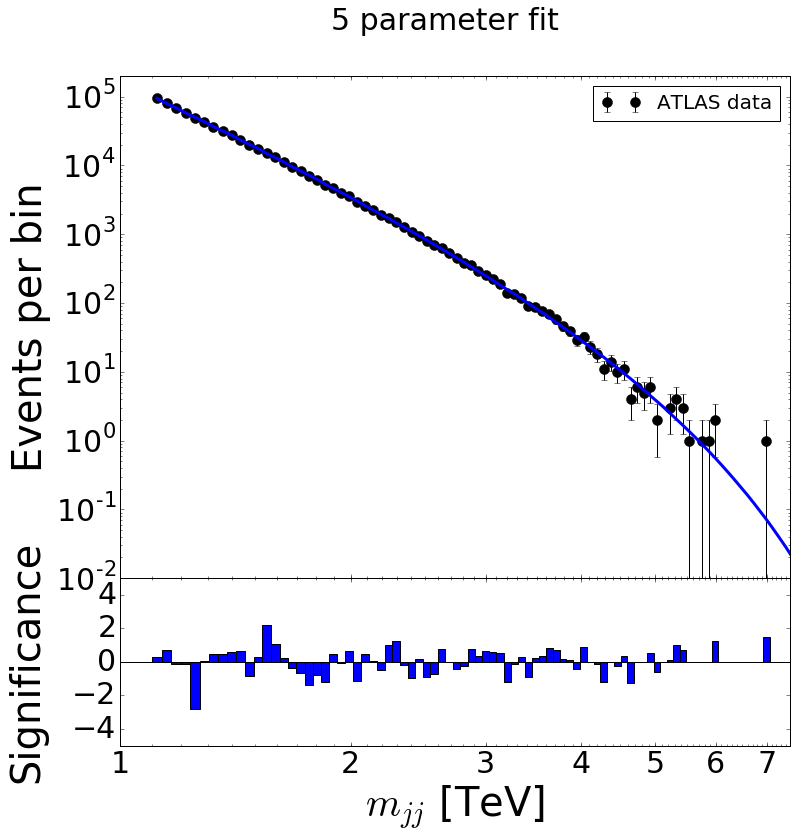

In [51]:
label = "5 parameter fit"
makePrettyPlots(xvalO, yvalO, bkg5param, label, "", xlowO, 'b')

#### Overlay 5 parameter fit and GP fit

chi2 bkg+signal mu=0 65.7917859887
chi2 bkg+signal 67.7969497636


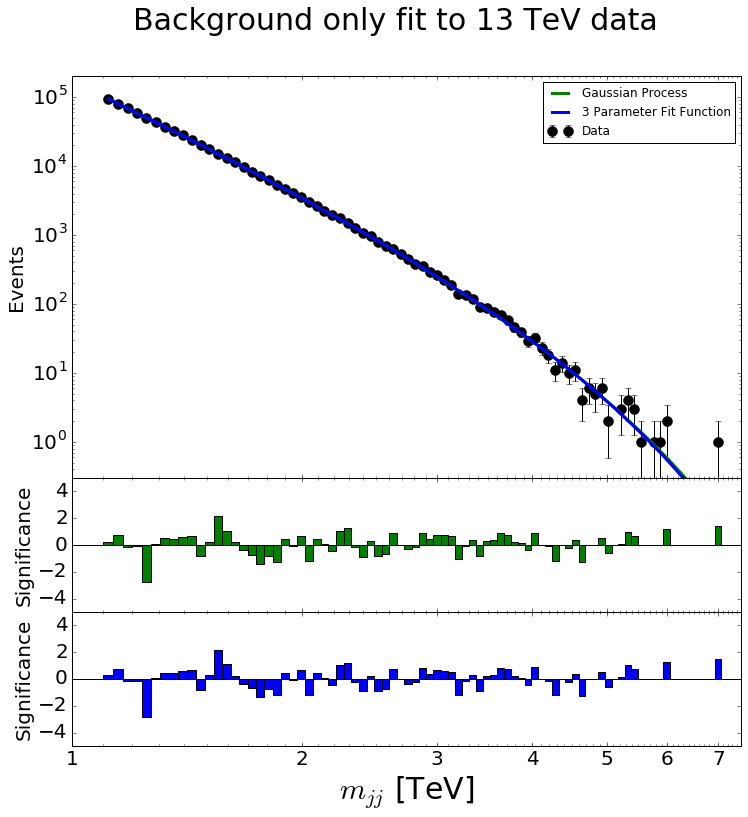

In [52]:
label = "Background only fit to 13 TeV data"
makePrettyPlots_compare(xvalO, yvalO, meanGPnom, bkg5param, label)

### make an extended dataset to smear - extend 5 parameter fit function to lower mass and append to ATLAS dataset. Add on zeros at the end to match length of extended binning

In [53]:
bkg5param = model_5param(fullx, best_fit_params, fullxerr)
fully=np.concatenate((bkg5param[:len(fullxerr)-len(xvalO_ext)], yvalO, np.zeros(len(xvalO_ext)-len(xvalO))))
np.save("newoutputs/yvalO_low", fully)

### Use a Gaussian kernel to smear dataset, and add Poisson noise to make toy dataset

In [54]:
def smear(s, lumi, smeared_bins, truth_bins, truth_err, nsmear=5):
    smeared_counts=np.zeros(len(smeared_bins))
    s=s*(lumi/3.6)
    bkg=bkg5param[:len(truth_bins)-len(xvalO_ext)]*(lumi/3.6)
    for n in range(nsmear):
        samp=np.concatenate((bkg, s))
        for xi, x in enumerate(smeared_bins):
            gaus = truth_err*ss.norm.pdf(x, truth_bins, 2*truth_err)
            gaus = gaus/np.sum(gaus)
            smeared_counts[xi]=np.sum(samp*gaus) 
        smeared_counts=0.97*smeared_counts
        s=np.concatenate((smeared_counts, np.zeros(len(xvalO_ext)-len(smeared_counts))))
    noisy_smeared_counts=np.random.poisson(smeared_counts)
    return smeared_counts, noisy_smeared_counts

In [55]:
fully=np.concatenate((yvalO, np.zeros(len(xvalO_ext)-len(xvalO))))
smeared, noisySmeared = smear(fully, 3.6, xvalO_ext, fullx, fullxerr, 5)

#### Compare smooth smeared dataset to 5 parameter fit to data, GP fit to data, and original dataset

115 115 115 115


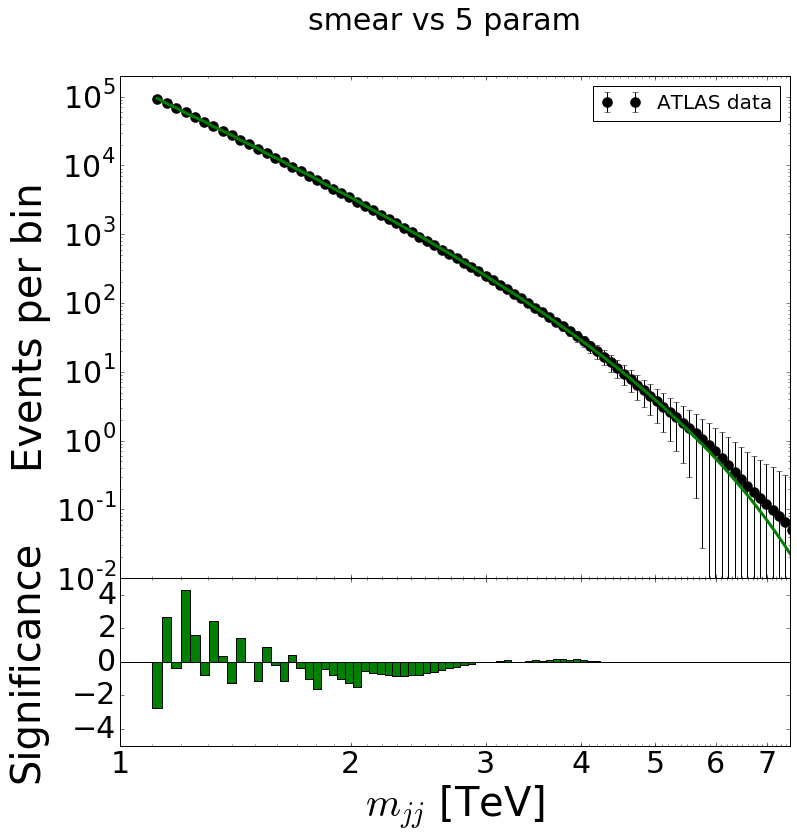

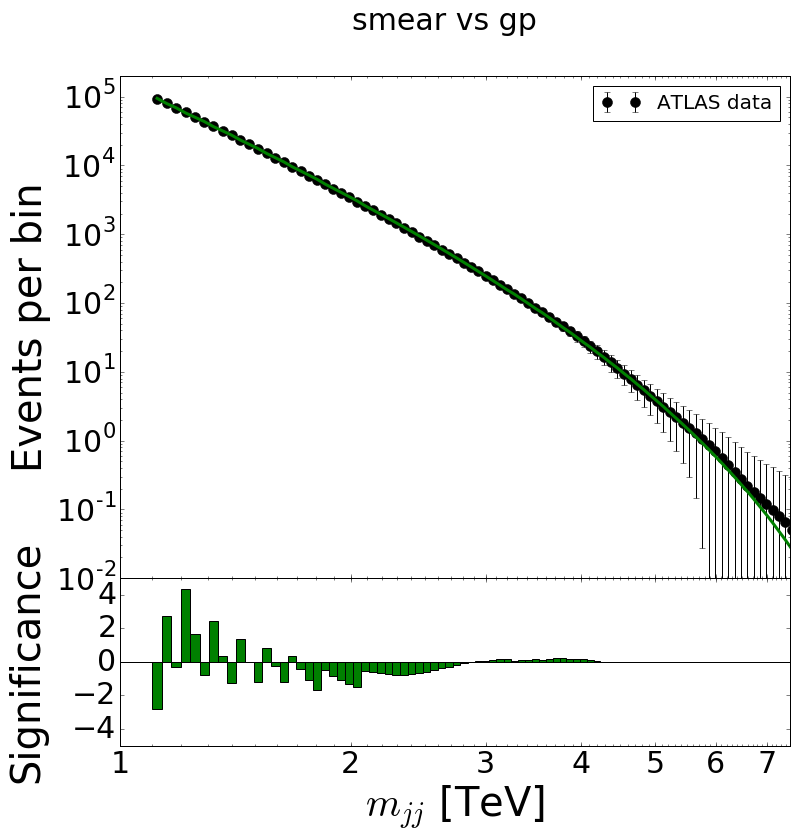

/Users/MeghanFrate/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in double_scalars


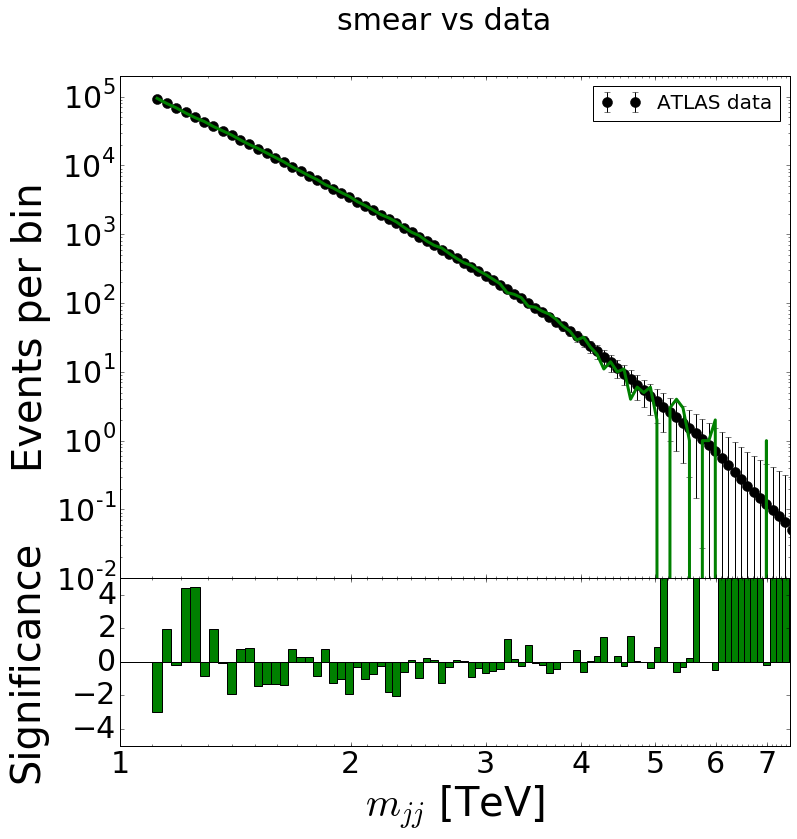

In [62]:
makePrettyPlots(xvalO_ext, smeared, bkg5param[len(fullxerr)-len(xvalO_ext):], "smear vs 5 param", "", xlowO_ext)
makePrettyPlots(xvalO, smeared[:-(len(xvalO_ext)-len(xvalO))], meanGPnom, "smear vs gp", "")
makePrettyPlots(xvalO, smeared[:-(len(xvalO_ext)-len(xvalO))], yvalO, "smear vs data", "")

### Make toys by adding Poisson noise to smeared dataset

In [63]:
smeared, noisySmeared = smear(fully, 3.6, xvalO, fullx, fullxerr, 5)
toyList=[]
for i in range(10000):
    toy=np.random.poisson(smeared)
    toyList.append(toy)
np.save("newoutputs/toyList",toyList)

/Users/MeghanFrate/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/Users/MeghanFrate/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in double_scalars


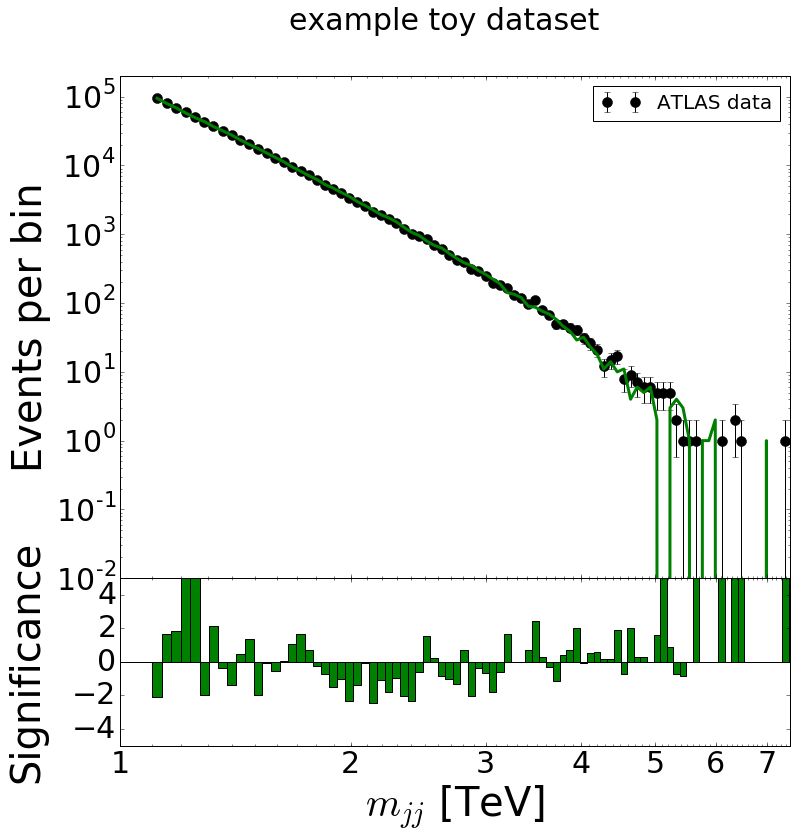

In [65]:
makePrettyPlots(xvalO, toy, yvalO,"example toy dataset","")

### Save Gaussian signal with Poisson noise at different injected masses added to toy datasets for signal tests

In [66]:
standardParamSets = [(500,2000,250), (700, 2500, 250), (200, 3000, 250), (150, 3500, 250), (75, 4000, 250), 
(75, 4500, 250), (75, 5000, 250), (50,5500, 250), (10, 6000,250)]

#Original
#standardParamSets = [(1500,2000,250), (750 ,2500, 250), (300, 3000, 250), (150, 3500, 250), (75, 4000, 250), 
#             (50, 4500, 250), (35, 5000, 250), (20,5500, 250), (15, 6000,250)]
#best set
#standardParamSets = [(2000,2000,250), (700, 2500, 250), (250, 3000, 250), (125, 3500, 250), (70, 4000, 250), 
#             (40, 4500, 250), (25, 5000, 250), (15,5500, 250), (10, 6000,250)]
#standardParamSets = [(2000,2000,250), (1000, 2500, 250), (400, 3000, 250), (200, 3500, 250), (100, 4000, 250), 
#             (75, 4500, 250), (50, 5000, 250), (40,5500, 250), (30, 6000,250)]
#george set
#standardParamSets = [(1200,2000,250), (500, 2500, 250), (250, 3000, 250), (125, 3500, 250), (100, 4000, 250), 
#             (60, 4500, 250), (50, 5000, 250), (40,5500, 250), (40, 6000,250)]

sigDict={}
sigDictO={}
for pSet in standardParamSets:
    n, m, w = pSet
    sigDict[m]=[]
    sigDictO[m]=[]
    for itoy, toy in enumerate(toyList):    
        ytoy, xtoy, xtoyerr = removeZeros(toy)
        signalTemplate = sig_model(xtoy, n, m, w, xtoyerr)
        signalTemplate = np.random.poisson(np.around(signalTemplate))
        sigDict[m].append(signalTemplate)
        
        signalTemplateO = sig_model(xvalO, n, m, w, xerrO)
        signalTemplateO = np.random.poisson(np.around(signalTemplateO))
        sigDictO[m].append(signalTemplateO)


np.save("newoutputs/signalToys", sigDict)
np.save("newoutputs/signalToys", sigDictO)

### Save toy datasets at different luminosities

In [67]:
lumiList = [1., 3., 5., 10., 15., 20., 25., 30., 35., 40., 45., 50., 60., 70., 80., 90., 100., 500., 1000.]
lumiToyDict={}
for lum in lumiList:
    lumi=lum/3.6
    smeared, noisySmeared = smear(fully, lumi, xvalO_ext, fullx, fullxerr, 5)
    lumiToyDict[lum]=[]
    for i in range(10000):
        toy=np.random.poisson(smeared)
        lumiToyDict[lum].append(toy)
np.save("newoutputs/lumiToyList", lumiToyDict)